# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [1]:
# !!pip uninstall tensorflow
# !pip install tensorflow==2.0.0

In [2]:
import tensorflow as tf
tf.__version__

E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

'1.14.0'

## Get Required Files from Drive

In [3]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [4]:
# #Set your project path 
# project_path =  ## Add your path here ##

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [5]:
import numpy as np
import pandas as pd

In [6]:
sarcasm=pd.read_json('E:\AI ML assignments\Sarcasm_Headlines_Dataset.json', lines=True)

In [7]:
sarcasm.head

<bound method NDFrame.head of                                             article_link  \
0      https://www.huffingtonpost.com/entry/versace-b...   
1      https://www.huffingtonpost.com/entry/roseanne-...   
2      https://local.theonion.com/mom-starting-to-fea...   
3      https://politics.theonion.com/boehner-just-wan...   
4      https://www.huffingtonpost.com/entry/jk-rowlin...   
...                                                  ...   
26704  https://www.huffingtonpost.com/entry/american-...   
26705  https://www.huffingtonpost.com/entry/americas-...   
26706  https://www.huffingtonpost.com/entry/reparatio...   
26707  https://www.huffingtonpost.com/entry/israeli-b...   
26708  https://www.huffingtonpost.com/entry/gourmet-g...   

                                                headline  is_sarcastic  
0      former versace store clerk sues over secret 'b...             0  
1      the 'roseanne' revival catches up to our thorn...             0  
2      mom starting to fear so

In [8]:
sarcasm.dtypes

article_link    object
headline        object
is_sarcastic     int64
dtype: object

In [9]:
count1 = sarcasm['headline'].str.split().apply(len).value_counts()
count1.index = count1.index.astype(str)
count1.sort_index(inplace=True)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=count1.index, y=count1, palette="vlag",ax=ax)
plt.show()

<Figure size 1500x400 with 1 Axes>

The dataset provided has 26709 comments which are split into three columns. 
The first column is the URL which isn't very relevant for the modelling to be done and hence, can be dropped
The second column contains the primary data which is the actual headline that needs to be classified
The third column has the target variable (is_sarcastic) that helps identify whether the statement is sarcastic or not
Further, most of the headlines have between 6 - 13 words (80%) which will help provide a better model given the number of combinations

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [11]:
sarcasm1=sarcasm.copy()

In [12]:
sarcasm.drop('article_link',axis=1)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


In [13]:
sarcasm.dtypes

article_link    object
headline        object
is_sarcastic     int64
dtype: object

## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [14]:
count_=[]
for i in range(sarcasm.shape[0]):
    count_.append(len(sarcasm['headline'][i].split()))

count2=np.array(count_)
count2

array([12, 14, 14, ...,  3,  8,  6])

In [15]:
count2.max()

39

There are 26709 lines and the lengths of each line are provided above. Further, the maximum length of any review is 39. Hence, we will pad with the same

#**## Modelling**

## Import required modules required for modelling.

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [17]:
max_features = 10000
maxlen = count2.max()
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [18]:
tkn=tf.keras.preprocessing.text.Tokenizer(
    num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True,
    split=' ', char_level=False, oov_token=None, document_count=0
)

In [19]:
tkn.fit_on_texts(
    sarcasm['headline']
)

In [20]:
tkn.get_config()

{'char_level': False,
 'document_count': 26709,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'index_docs': '{"15114": 1, "47": 477, "15115": 1, "8433": 3, "678": 55, "307": 105, "2575": 15, "2297": 17, "5": 3253, "3336": 11, "381": 86, "2576": 15, "8434": 3, "257": 120, "165": 169, "8435": 3, "8": 1877, "3337": 11, "1": 7486, "415": 80, "3111": 12, "3": 4612, "21": 828, "2745": 14, "1001": 36, "906": 42, "38": 551, "837": 45, "45": 490, "581": 62, "10735": 2, "4718": 7, "144": 193, "1748": 23, "220": 137, "142": 188, "2092": 19, "967": 40, "9": 1783, "1831": 22, "6968": 4, "2923": 12, "35": 571, "28": 710, "1392": 29, "1484": 27, "399": 83, "223": 138, "318": 103, "10736": 2, "622": 59, "91": 264, "1308": 31, "4719": 7, "94": 254, "907": 42, "718": 52, "766": 42, "4": 4100, "593": 61, "72": 320, "364": 89, "10737": 2, "6969": 4, "460": 75, "350": 93, "4273": 8, "2194": 18, "1485": 26, "31": 620, "157": 180, "30": 632, "154": 179, "351": 93, "18": 887, "478": 73, "1167": 33, "98

# Define X and y for your model.

In [21]:
X = tkn.texts_to_sequences(sarcasm['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(sarcasm['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  307  678 3336 2297   47  381 2575    5 2576 8433]
Number of Labels:  26709
0


## Get the Vocabulary size ( 2 marks)

Hint : You can use tokenizer.word_index.

In [22]:
tkn.word_index
voc=len(tkn.word_index)+1

#**## Word Embedding**

## Get Glove Word Embeddings

In [23]:
# glove_file = project_path + "glove.6B.zip"

In [24]:
# #Extract Glove embedding zip file
# from zipfile import ZipFile
# with ZipFile(glove_file, 'r') as z:
#   z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [25]:
file_open = open('glove.6B.200d.txt', encoding="utf8")

EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings_1 = {}
for o in file_open:
    word1 = o.split(" ")[0]
#     print('Word')
#     print(word1)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
#     print('Embed')
#     print(embd)
    embeddings_1[word1] = embd
file_open.close()


# Create a weight matrix for words in training docs

In [26]:
embedding_matrix = np.zeros((voc, 200))

for word, i in tkn.word_index.items():
    embedding_vector = embeddings_1.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings_1.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [27]:
from sklearn.model_selection import train_test_split
print('Number of sarcastic comments in the data is',np.count_nonzero(y==1) ,'percentage is: ',np.count_nonzero(y==1)*100/np.size(y), '%')
print('Number of non-sarcastic comments in the data is',np.count_nonzero(y==0),'percentage is: ',np.count_nonzero(y==0)*100/np.size(y), '%')


Number of sarcastic comments in the data is 11724 percentage is:  43.89531618555543 %
Number of non-sarcastic comments in the data is 14985 percentage is:  56.10468381444457 %


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_test

(21367, 39)
(5342, 39)
(21367,)
(5342,)


array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [30]:
print('Number of sarcastic comments in the train data is',np.count_nonzero(y_train==1) ,'percentage is: ',np.count_nonzero(y_train==1)*100/np.size(y_train), '%')
print('Number of non-sarcastic comments in the train data is',np.count_nonzero(y_train==0),'percentage is: ',np.count_nonzero(y_train==0)*100/np.size(y_train), '%')
print('Number of sarcastic comments in the test data is',np.count_nonzero(y_test==1) ,'percentage is: ',np.count_nonzero(y_test==1)*100/np.size(y_test), '%')
print('Number of non-sarcastic comments in the test data is',np.count_nonzero(y_test==0),'percentage is: ',np.count_nonzero(y_test==0)*100/np.size(y_test), '%')

Number of sarcastic comments in the train data is 9379 percentage is:  43.8947910329012 %
Number of non-sarcastic comments in the train data is 11988 percentage is:  56.1052089670988 %
Number of sarcastic comments in the test data is 2345 percentage is:  43.89741669786597 %
Number of non-sarcastic comments in the test data is 2997 percentage is:  56.10258330213403 %


# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [31]:
import keras
from keras.initializers import Constant
from keras.layers import Dropout, Flatten, Dense, Embedding, LSTM, TimeDistributed, Conv1D, MaxPooling1D, SpatialDropout1D
from keras.models import Sequential
from keras.layers import *
from keras.utils.np_utils import to_categorical
from keras.initializers import Constant

Using TensorFlow backend.


In [32]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))
# Build the model
embedding_dim = 200

model = Sequential()
model.add(Embedding(voc,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,
                    trainable=True))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(CuDNNLSTM(128, return_sequences=True)))
model.add(Bidirectional(CuDNNLSTM(64)))
model.add(Dropout(0.25))
#model.add(Dense(units=2, activation='sigmoid')) # found softmax to work better
model.add(Dense(units=2, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 39, 200)           5931400   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 39, 200)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 39, 256)           337920    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               164864    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 6,434,442
Trainable params: 6,434,442
Non-trainable params: 0
____________________________________________

In [33]:
y_test

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [34]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [35]:
y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [36]:
batch_size = 100
epochs = 5
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)
## Add your code here ##


Train on 17093 samples, validate on 4274 samples
Epoch 1/5
17093/17093 [==============================] - 7s 404us/step - loss: 0.4821 - accuracy: 0.7607 - val_loss: 0.3591 - val_accuracy: 0.8439
Epoch 2/5
17093/17093 [==============================] - 4s 231us/step - loss: 0.3154 - accuracy: 0.8646 - val_loss: 0.3178 - val_accuracy: 0.8692
Epoch 3/5
17093/17093 [==============================] - 4s 231us/step - loss: 0.2357 - accuracy: 0.9040 - val_loss: 0.3069 - val_accuracy: 0.8711
Epoch 4/5
17093/17093 [==============================] - 4s 230us/step - loss: 0.1736 - accuracy: 0.9308 - val_loss: 0.3267 - val_accuracy: 0.8723
Epoch 5/5
17093/17093 [==============================] - 4s 231us/step - loss: 0.1303 - accuracy: 0.9526 - val_loss: 0.3652 - val_accuracy: 0.8678


In [37]:
def graph(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


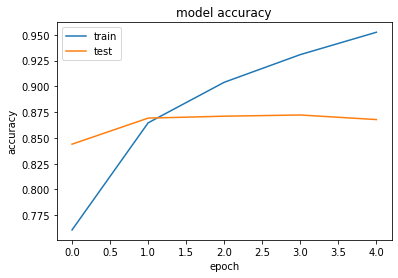

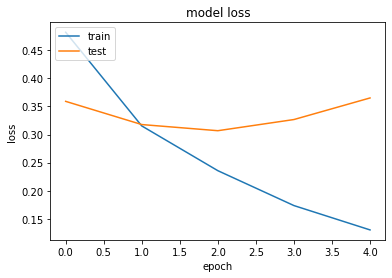

In [38]:
graph(history)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve

In [40]:
score,acc = model.evaluate(X_test, y_test)
print('Accuracy of the model on test set is:',acc)
print('Score of the model on test set is:',score)
y_pred = (model.predict(X_test)>0.3).astype('int32')
y_proba = model.predict_proba(X_test)

5342/5342 [==============================] - 1s 135us/step
Accuracy of the model on test set is: 0.8749532103538513
Score of the model on test set is: 0.3499943332161541


In [41]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve

In [42]:
print('\033[1mTesting accuracy:\033[0m %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print('\033[1mClassification report:\033[0m\n %s' % (classification_report(y_test, y_pred)))

Testing accuracy: 83.71%
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89      2997
           1       0.83      0.88      0.86      2345

   micro avg       0.85      0.91      0.88      5342
   macro avg       0.85      0.90      0.87      5342
weighted avg       0.85      0.91      0.88      5342
 samples avg       0.87      0.91      0.88      5342



We have been able to create a model with 87% accuracy using the 200-word vocabulary provided as part of the GloVe model. This model can be further improved by changing various types of tokenizers such as RegExp tokenizer which is faster than the standard in built tokenizer and the various hyperparameters of the model (number of b-directional RNN layers and number of nodes. Further, the model is better at identifying non-sarcastic terms than sarcastic terms with an exceptionally higher recall than precision.
Further, if we use the vocabulary of 300 dimensions (Refer file: glove.6B.300d, the overall accuracy drops from 82.82% to 82.65%. However, the recall score for class 1 increases quite significantly from 0.86 to 0.91 (Refer to file Swaminathan Kannan_Project Sarcasm_1 for workings on glove.6B.300d file)


In [43]:
embedding_dim = 200

model_200_2 = Sequential()
model_200_2.add(Embedding(voc,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,
                    trainable=True))
model_200_2.add(SpatialDropout1D(0.2))
model_200_2.add(Bidirectional(CuDNNLSTM(64, return_sequences=True)))
model_200_2.add(Bidirectional(CuDNNLSTM(32, return_sequences=True)))
model_200_2.add(Bidirectional(CuDNNLSTM(8)))
model_200_2.add(Dropout(0.25))
model_200_2.add(Dense(units=2, activation='softmax'))
model_200_2.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_200_2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 39, 200)           5931400   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 39, 200)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 39, 128)           136192    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 39, 64)            41472     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 16)                4736      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                

In [44]:
batch_size = 100
epochs = 5
history_200_2 = model_200_2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 17093 samples, validate on 4274 samples
Epoch 1/5
17093/17093 [==============================] - 5s 286us/step - loss: 0.5010 - accuracy: 0.7531 - val_loss: 0.3604 - val_accuracy: 0.8435
Epoch 2/5
17093/17093 [==============================] - 4s 221us/step - loss: 0.3217 - accuracy: 0.8661 - val_loss: 0.3161 - val_accuracy: 0.8655
Epoch 3/5
17093/17093 [==============================] - 4s 220us/step - loss: 0.2461 - accuracy: 0.9053 - val_loss: 0.3093 - val_accuracy: 0.8786
Epoch 4/5
17093/17093 [==============================] - 4s 222us/step - loss: 0.1894 - accuracy: 0.9287 - val_loss: 0.3241 - val_accuracy: 0.8727
Epoch 5/5
17093/17093 [==============================] - 4s 221us/step - loss: 0.1461 - accuracy: 0.9458 - val_loss: 0.3548 - val_accuracy: 0.8723


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


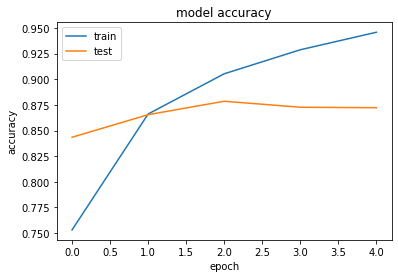

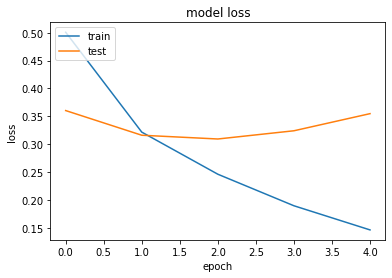

In [45]:
graph(history_200_2)

In [46]:
score,acc = model_200_2.evaluate(X_test, y_test)
print('Accuracy of the model on test set is:',acc)
print('Score of the model on test set is:',score)
y_pred = (model_200_2.predict(X_test)>0.3).astype('int32')
y_proba = model_200_2.predict_proba(X_test)

5342/5342 [==============================] - 1s 159us/step
Accuracy of the model on test set is: 0.8717708587646484
Score of the model on test set is: 0.3420031203597907


In [47]:
print('\033[1mTesting accuracy:\033[0m %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print('\033[1mClassification report:\033[0m\n %s' % (classification_report(y_test, y_pred)))

Testing accuracy: 83.21%
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      2997
           1       0.82      0.90      0.86      2345

   micro avg       0.84      0.91      0.87      5342
   macro avg       0.84      0.91      0.87      5342
weighted avg       0.84      0.91      0.87      5342
 samples avg       0.87      0.91      0.88      5342



In [48]:
Acc_base=0.5
n1=[128,64]
n2=[64,16,8]
n3=[8,4]
for i in n1:
    for j in n2:
        for k in n3:
            model='model'+str(i)+'-'+str(j)+'-'+str(k)
            model_200_2 = Sequential()
            model_200_2.add(Embedding(voc,
                            embedding_dim,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=True))
            model_200_2.add(SpatialDropout1D(0.2))
            model_200_2.add(Bidirectional(CuDNNLSTM(i, return_sequences=True)))
            model_200_2.add(Bidirectional(CuDNNLSTM(j, return_sequences=True)))
            model_200_2.add(Bidirectional(CuDNNLSTM(k)))
            model_200_2.add(Dropout(0.25))
            model_200_2.add(Dense(units=2, activation='softmax'))
            model_200_2.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
            hist=model_200_2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2)
            score,acc = model_200_2.evaluate(X_test, y_test)
            if(acc>Acc_base):
                acc1=acc
                Acc_base=acc
                model1=model
data=[acc1,model1]

5342/5342 [==============================] - 1s 182us/step


In [49]:
data

[0.8770123720169067, 'model128-64-8']

In [50]:
model_200_3 = Sequential()
model_200_3.add(Embedding(voc,
                embedding_dim,
                embeddings_initializer=Constant(embedding_matrix),
                input_length=maxlen,
                trainable=True))
model_200_3.add(SpatialDropout1D(0.2))
model_200_3.add(Bidirectional(CuDNNLSTM(128, return_sequences=True)))
model_200_3.add(Bidirectional(CuDNNLSTM(64, return_sequences=True)))
model_200_3.add(Bidirectional(CuDNNLSTM(8)))
model_200_3.add(Dropout(0.25))
model_200_3.add(Dense(units=2, activation='softmax'))
model_200_3.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
hist=model_200_3.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)
score,acc = model_200_3.evaluate(X_test, y_test)

Train on 17093 samples, validate on 4274 samples
Epoch 1/5
17093/17093 [==============================] - 8s 459us/step - loss: 0.4973 - accuracy: 0.7584 - val_loss: 0.3789 - val_accuracy: 0.8264
Epoch 2/5
17093/17093 [==============================] - 5s 291us/step - loss: 0.3200 - accuracy: 0.8673 - val_loss: 0.3245 - val_accuracy: 0.8594
Epoch 3/5
17093/17093 [==============================] - 5s 288us/step - loss: 0.2514 - accuracy: 0.9005 - val_loss: 0.3177 - val_accuracy: 0.8613
Epoch 4/5
17093/17093 [==============================] - 5s 289us/step - loss: 0.1955 - accuracy: 0.9252 - val_loss: 0.3186 - val_accuracy: 0.8669
Epoch 5/5
5342/5342 [==============================] - 1s 205us/step


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


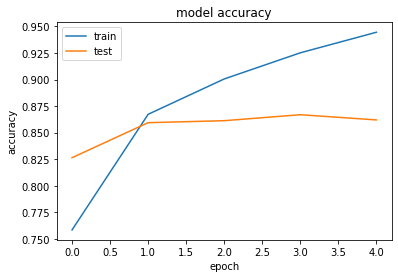

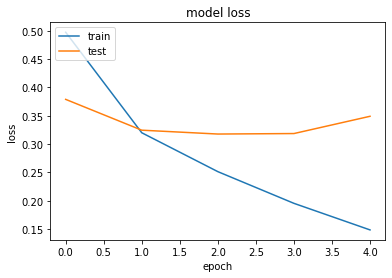

In [52]:
graph(hist)

In [53]:
score,acc = model_200_3.evaluate(X_test, y_test)
print('Accuracy of the model on test set is:',acc)
print('Score of the model on test set is:',score)
y_pred = (model_200_3.predict(X_test)>0.3).astype('int32')
y_proba = model_200_3.predict_proba(X_test)

5342/5342 [==============================] - 1s 203us/step
Accuracy of the model on test set is: 0.8609135150909424
Score of the model on test set is: 0.3389493544889005


In [54]:
print('\033[1mTesting accuracy:\033[0m %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print('\033[1mClassification report:\033[0m\n %s' % (classification_report(y_test, y_pred)))

Testing accuracy: 81.06%
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      2997
           1       0.76      0.94      0.84      2345

   micro avg       0.83      0.91      0.87      5342
   macro avg       0.83      0.91      0.86      5342
weighted avg       0.83      0.91      0.87      5342
 samples avg       0.86      0.91      0.87      5342



Hence, the accuracy of the validation set does not necessarily show an improvement in the f1-score instead shows a decrease in the same while trying to increase the number of layers. Reference to the scores for the 300d data is available on Swaminathan_Kannan_Project Sarcasm_300d file also attached as part of the submission

Hence, the best comparison of the models is as follows:

<table style="width:80%">
<tr>
<th>Metric</th>
<th>200d - Model</th>
<th>200d - Model_200_2</th>
<th>200d - Model_200_3</th>
<th>300d</th>
</tr>

<tr>
<td>Precision score(Class 0)  </td>
<td>0.86</td>
<td>0.87</td>
<td>0.89</td>
<td>0.84</td>
</tr>
    
<tr>
<td>Precision score(Class 1)</td>
<td>0.83</td>
<td>0.82</td>
<td>0.76</td>
<td>0.89</td>
</tr>

<tr>
<td>Recall score(Class 0)</td>
<td>0.93</td>
<td>0.91</td>
<td>0.88</td>
<td>0.89</td>
</tr>

<tr>
<td>Recall score(Class 1)</td>
<td>0.88</td>
<td>0.9</td>
<td>0.94</td>
<td>0.91</td>
</tr>

<tr>
<td>f1-score(Class 0)</td>
<td>0.89</td>
<td>0.89</td>
<td>0.89</td>
<td>0.88</td>

<tr>
<td>f1-score(Class 1)</td>
<td>0.86</td>
<td>0.86</td>
<td>0.84</td>
<td>0.88</td>
</tr>

</table>

<b><u>FINAL CONCLUSION:</b></u><br>
<b>Class 1 (Record is sarcastic) is our primary class. For the same, we see that that the 300d has the highest precision score while the model 200_3 has the highest recall. Given that the model's robustness is determined by whether a sarcastic comment in reality has been identified as a sarcastic comment or not, we would determine that Model_200_3 would be the model we should deploy. Further, if we look at the parameters for Model_200_3, we notice that the most optimum result has come from introducing the maximum number of nodes in each Dense layer from our arrays n1, n2 and n3. Hence, we can also arrive at the conclusion that additional layers rather than more dimensions will further increase the recall of this model. If we however improve the precision of the model, we can do so by adding additional dimensions to our data